In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

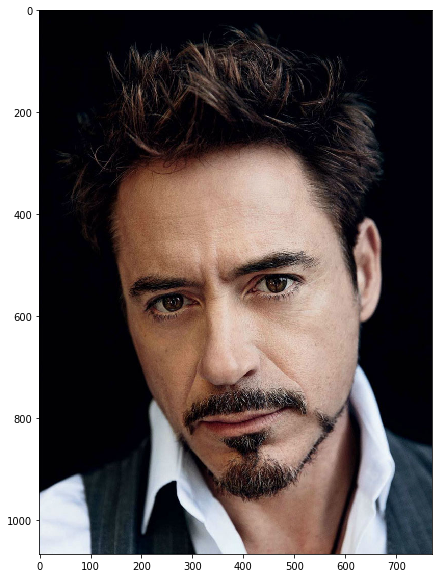

In [14]:
# Reading image
imageDowney = 'rdj.png'
imgDowney = io.imread(imageDowney)

# Ensuring that the image is float
imgDowney = ((imgDowney - np.min(imgDowney)) * (1/(np.max(imgDowney) - np.min(imgDowney)) * 1.0)).astype('float')

# Show image
fig1 = plt.figure(figsize = (10, 10))
plt.imshow(imgDowney, cmap='gray')

In [4]:
%matplotlib qt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(7,7))
img = mpimg.imread('rdj.png')
imgplot = plt.imshow(img)
def onclick(event):
    print("xdata = %f, ydata = %f"%(event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

xdata = 256.960000, ydata = 567.624503
xdata = 460.467285, ydata = 539.359603


In [12]:
theta = math.pi/6.0

T = np.array([[math.cos(theta), -math.sin(theta), 0], [math.sin(theta), math.cos(theta), 0], [0,0,1]])
Tinv = np.linalg.inv(T)

print(T)
print(Tinv)

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


In [13]:
[rows, cols] = imgDowney.shape

out_im1 = np.zeros((rows,cols))

for i in range(0, rows):
    for j in range(0, cols):
        
        cur_pt = np.array([i,j,1])
        transformed_pt = T.dot(cur_pt)
        
        transformed_pt = transformed_pt / transformed_pt[2]
        
        # Nearest neighbor interpolation
        new_i = int(round(transformed_pt[0]))
        new_j = int(round(transformed_pt[1]))
        
        if (new_i < 0 or new_i >= rows or new_j < 0 or new_j >= cols):
            continue
            
        out_im1[i,j] = imgDowney[new_i, new_j]
        
# Show the image
fig1 = plt.figure(figsize = (7,7))
plt.imshow(out_im1)

ValueError: too many values to unpack (expected 2)